## <center> Student Performance Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.shape

(1000, 8)

### there are 1000 rows and 8 columns

### Data Checks to Perform
- Check Missing Values
- Check Duplicates
- Check Data Type
- Check the Number of Unique Values of Each Column
- Check Statistics of Data Set
- Check Various Categories Present in Different Categorical Columns

In [4]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### there are no missing values

In [5]:
data.duplicated().sum()

0

#### there are no Duplicate values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### the above data shows gender,race/ethnicity,parental level of education,lunch,test preparation course are in String format and \n math score,reading score,writing score are in Integer format.

In [8]:
#Checking the Number of Unique Values of Each Column 
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
#Check Statistics of Dataset
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


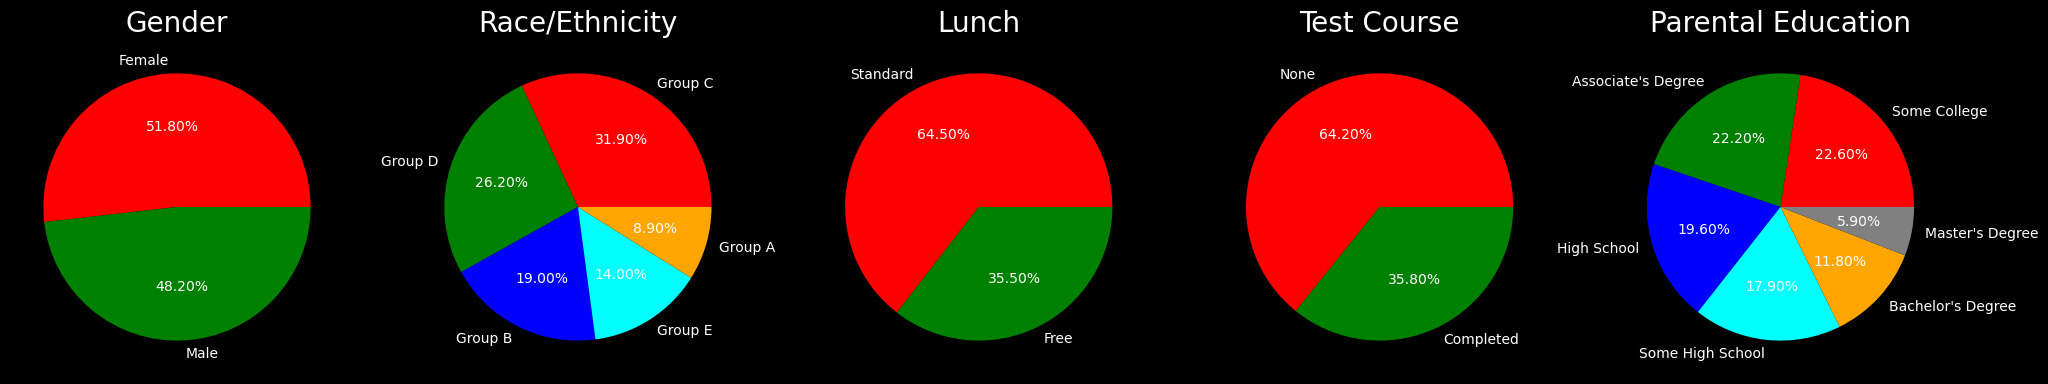

In [10]:
plt.rcParams['figure.figsize'] = (25, 12)
plt.style.use("dark_background")
# Create a subplot with five pie charts side by side
plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = data['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = data['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = data['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')


plt.grid()
plt.show()

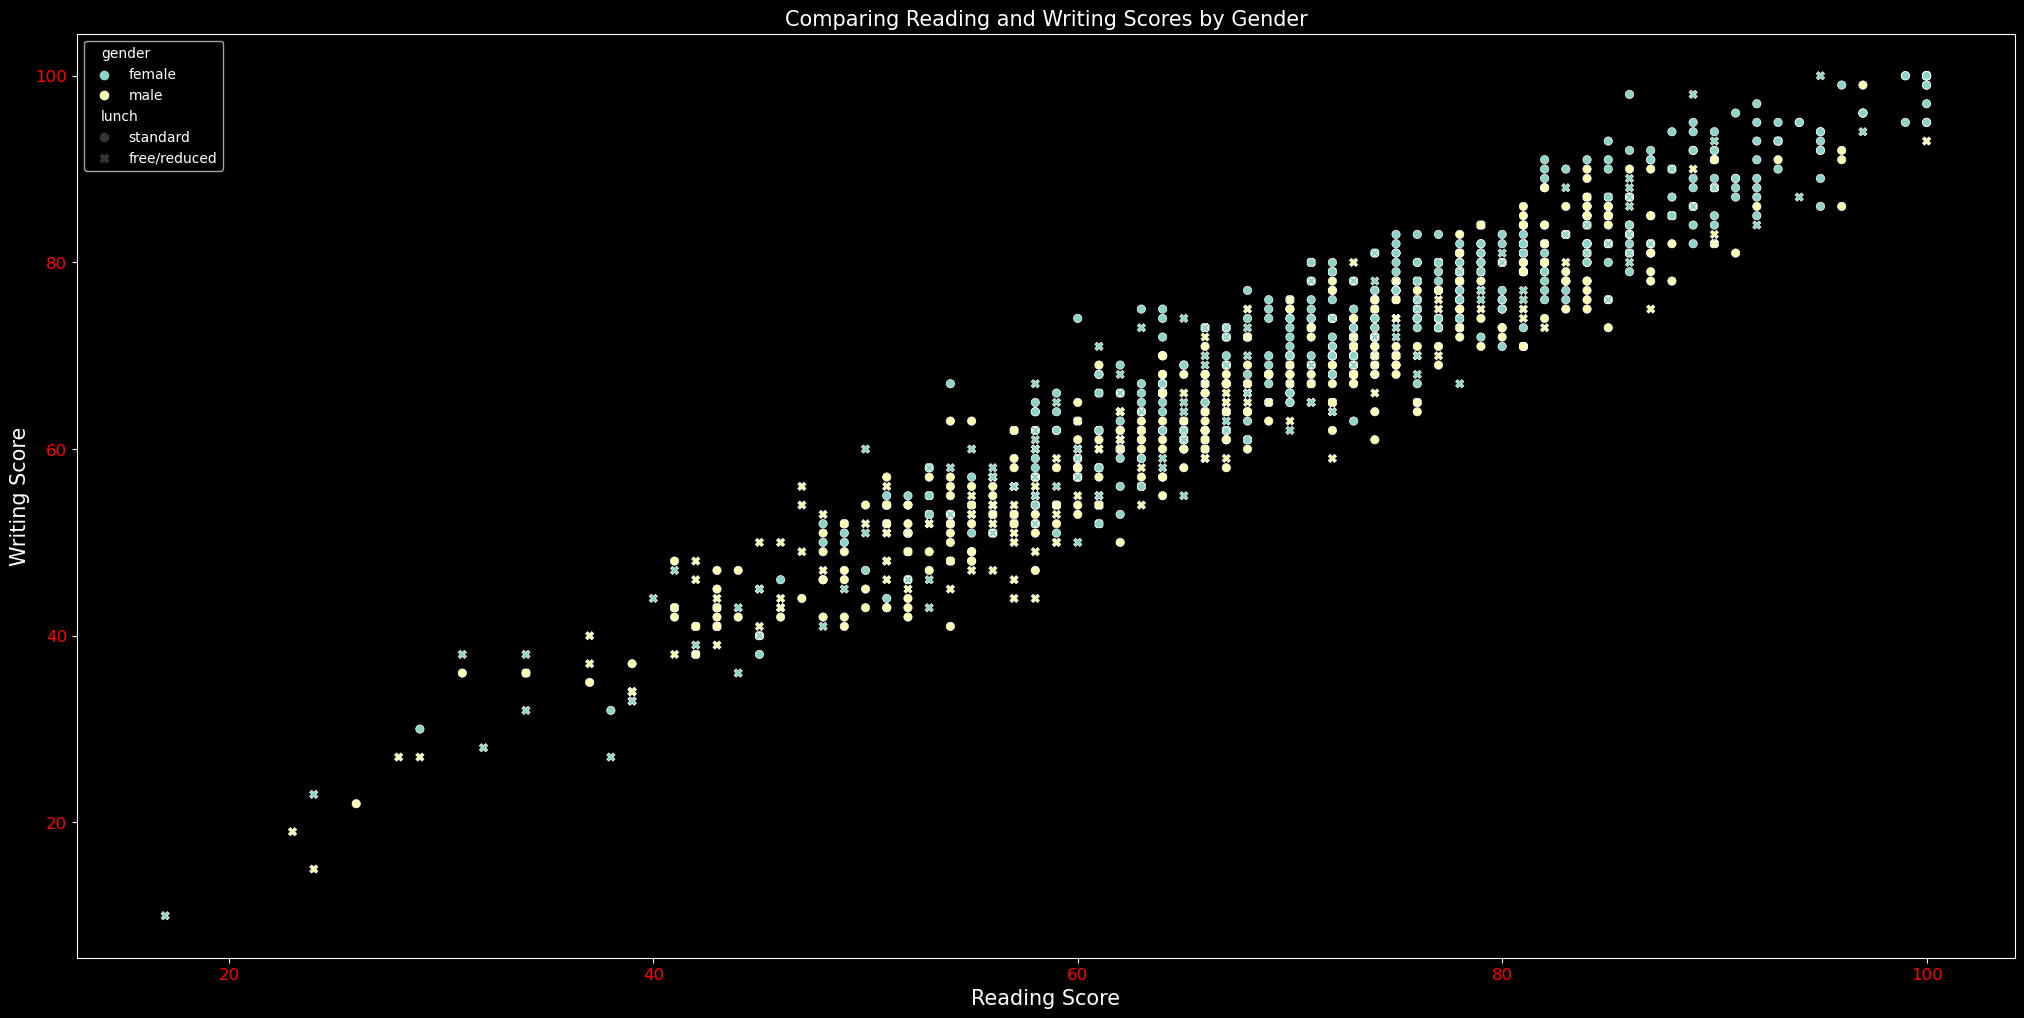

In [11]:
sns.scatterplot(data=data,x="reading score",y="writing score",hue="gender",style="lunch")
plt.title("Comparing Reading and Writing Scores by Gender",fontsize=15)
plt.xticks(fontsize=12,color="red")
plt.yticks(fontsize=12,color="red")

plt.xlabel("Reading Score",fontsize=15)
plt.ylabel("Writing Score",fontsize=15)
plt.show()

In [12]:
# make combinations of the data
from itertools import combinations 

In [13]:
hues=["gender","test preparation course"]
cols=["math score","reading score","writing score"]

In [14]:
cols=list(combinations(cols,2))
cols

[('math score', 'reading score'),
 ('math score', 'writing score'),
 ('reading score', 'writing score')]

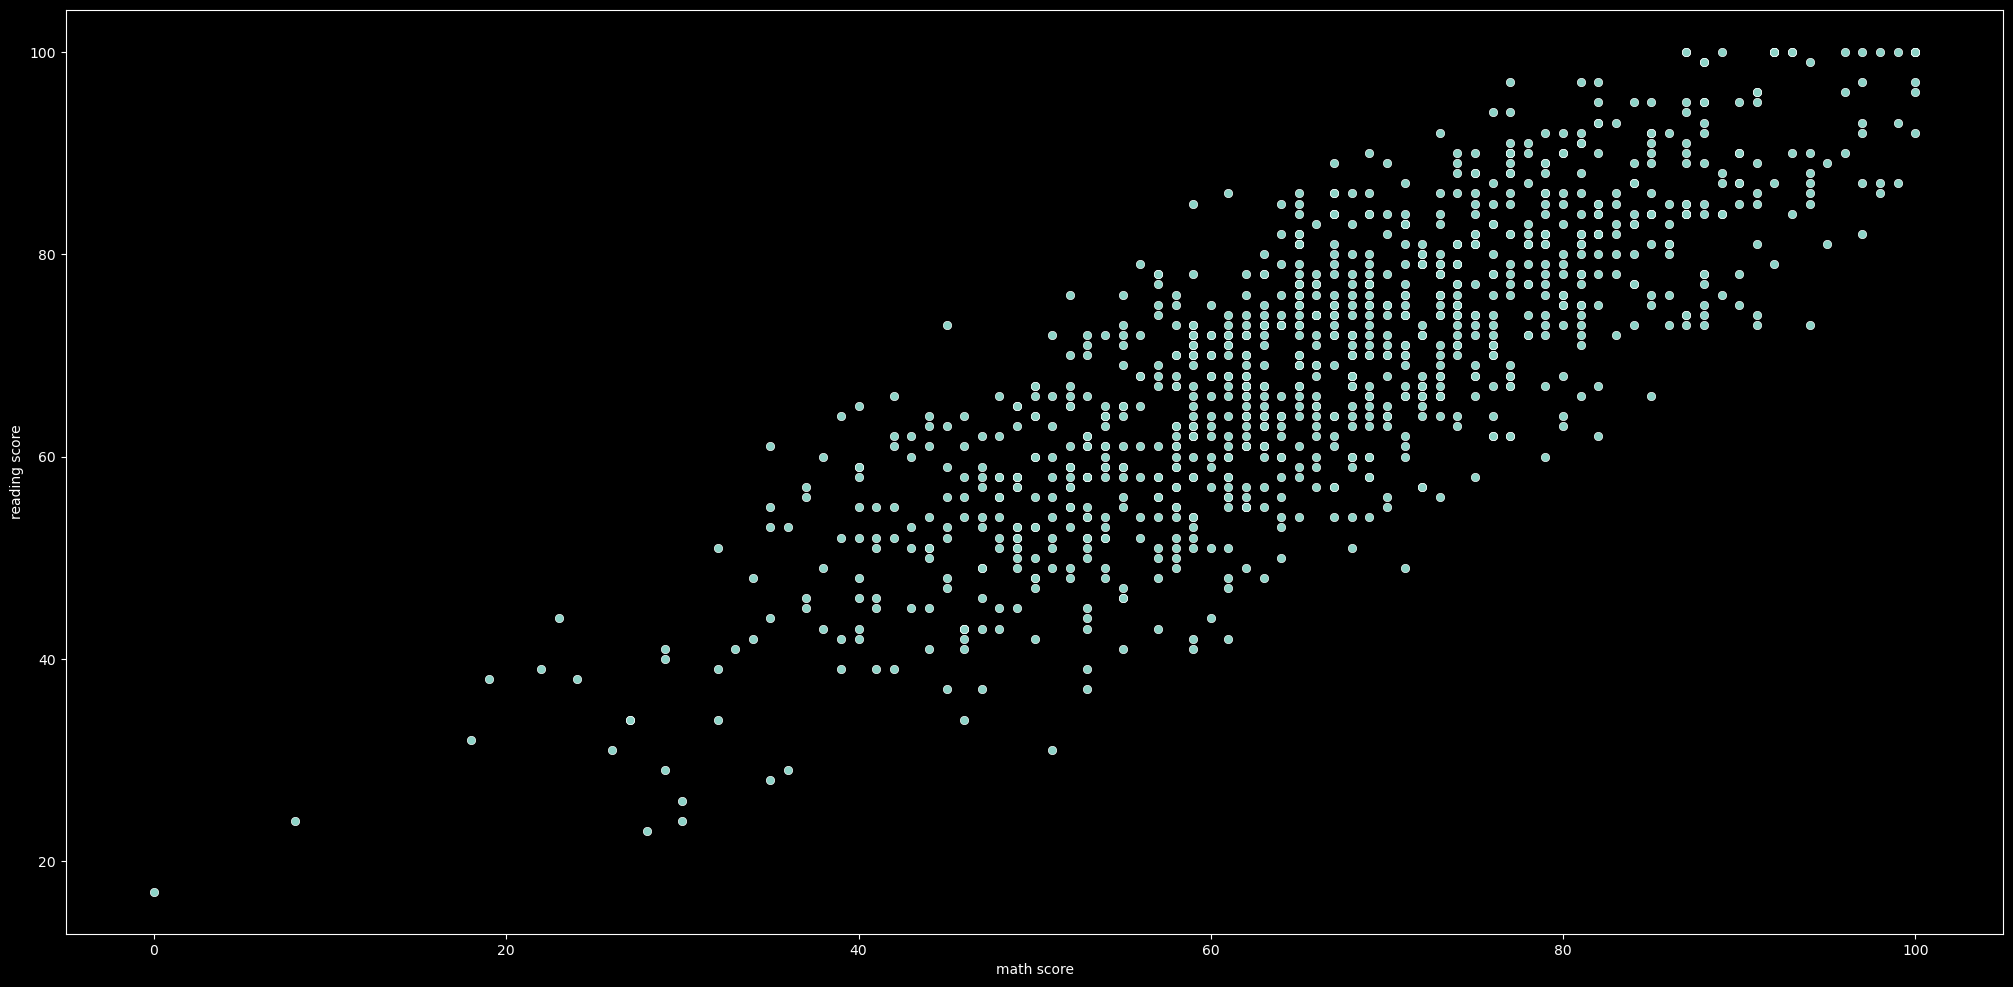

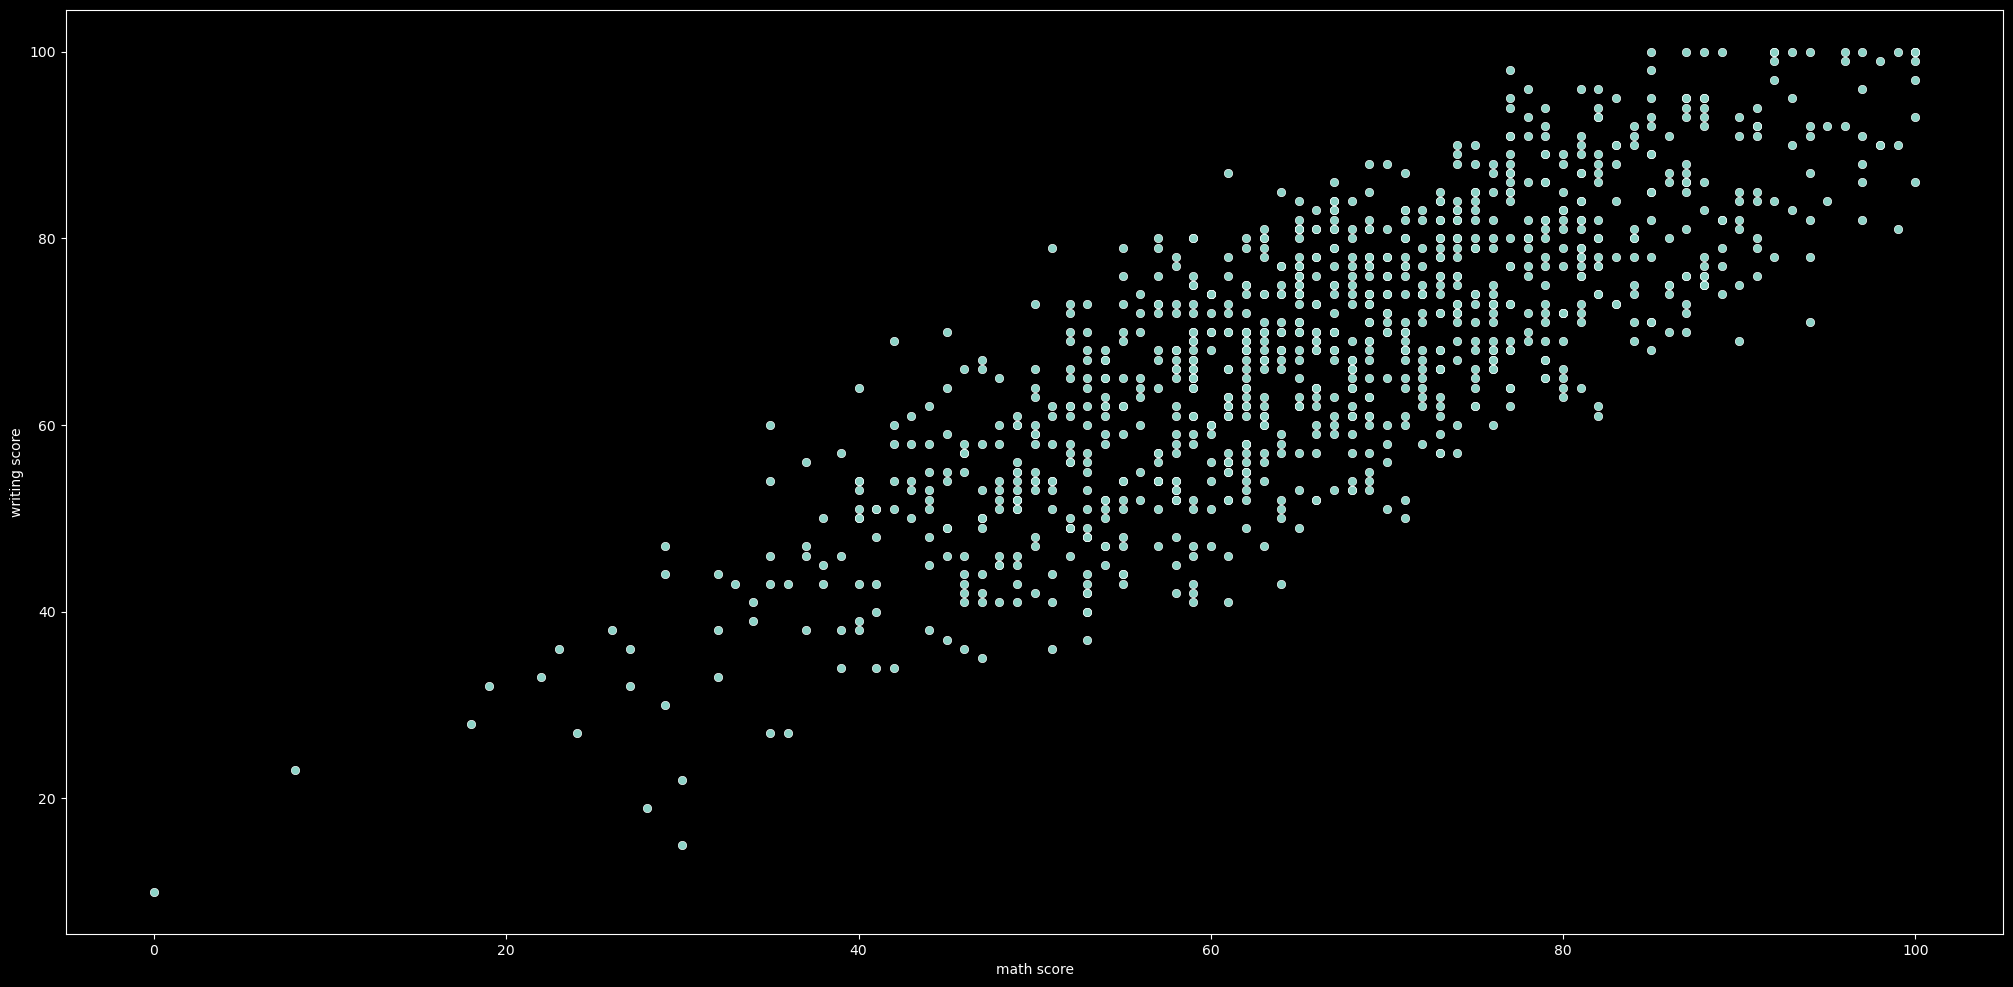

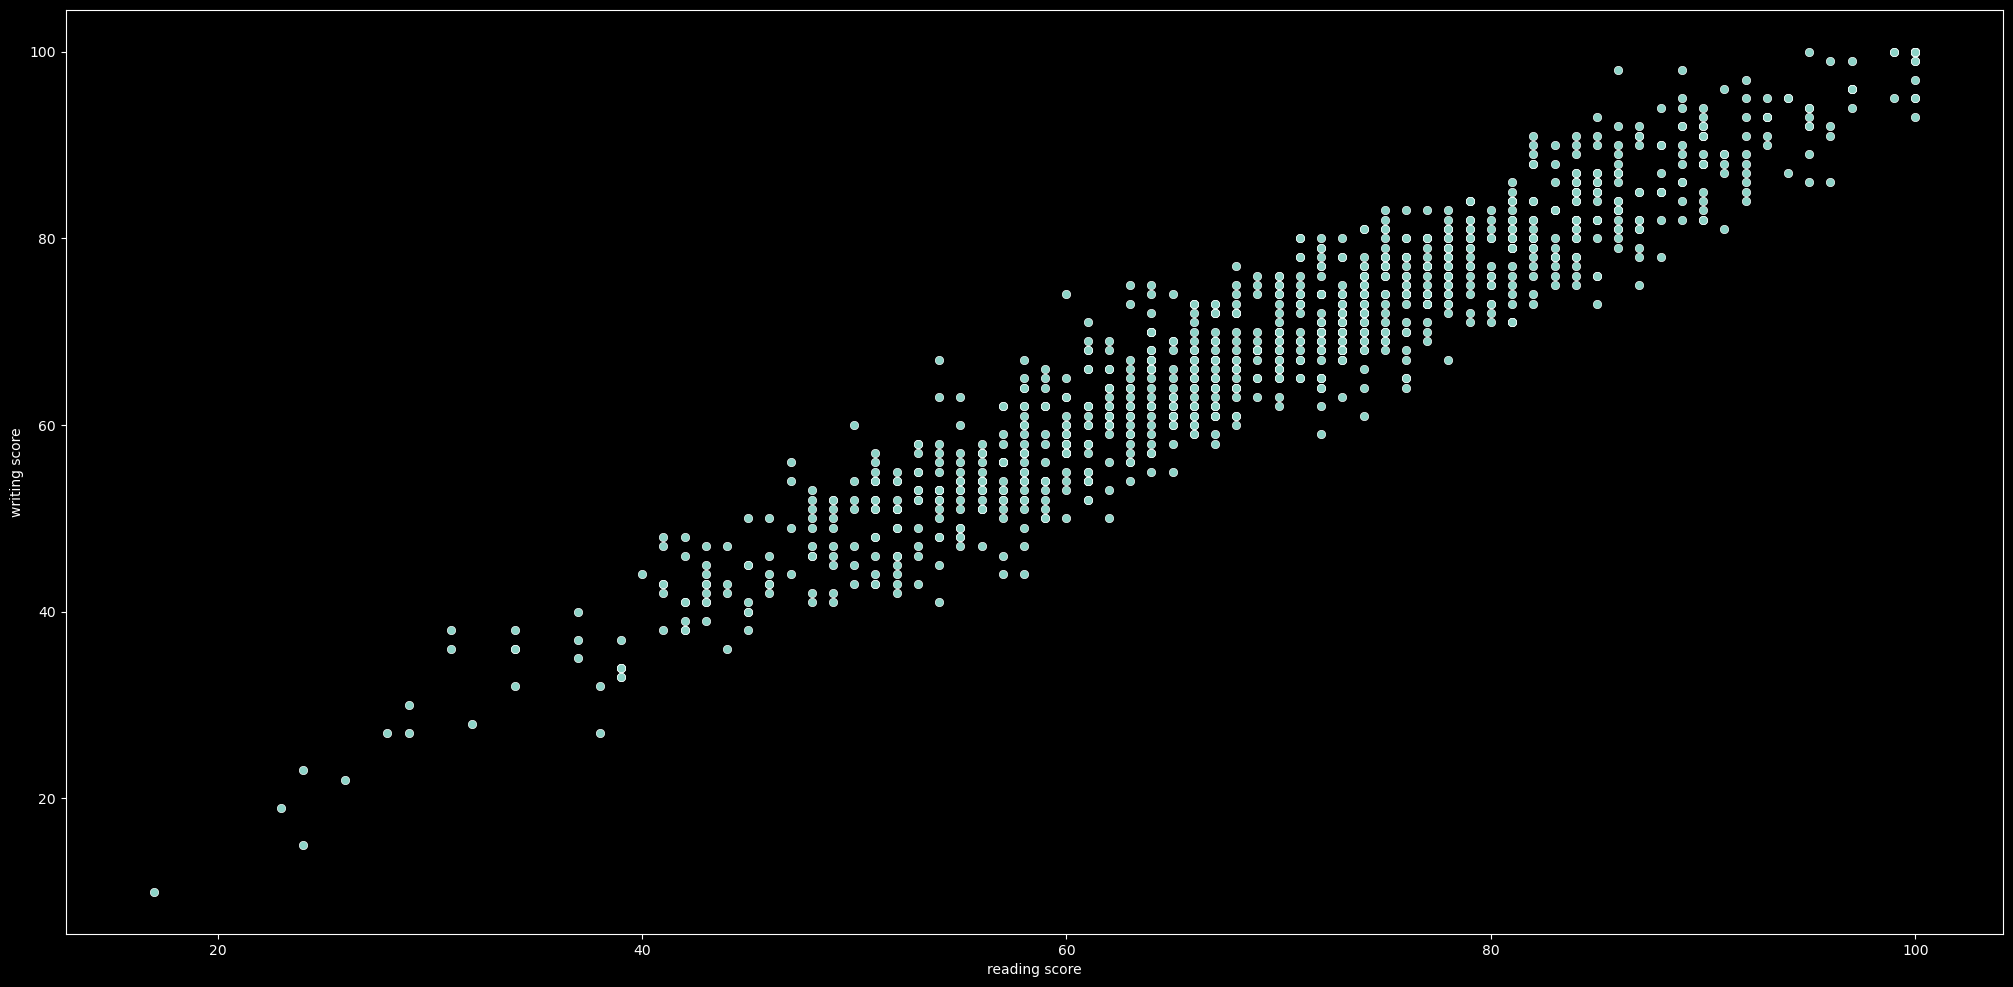

In [15]:

for subject1,subject2 in cols:
    sns.scatterplot(data=data,x=subject1,y=subject2)
    plt.show()

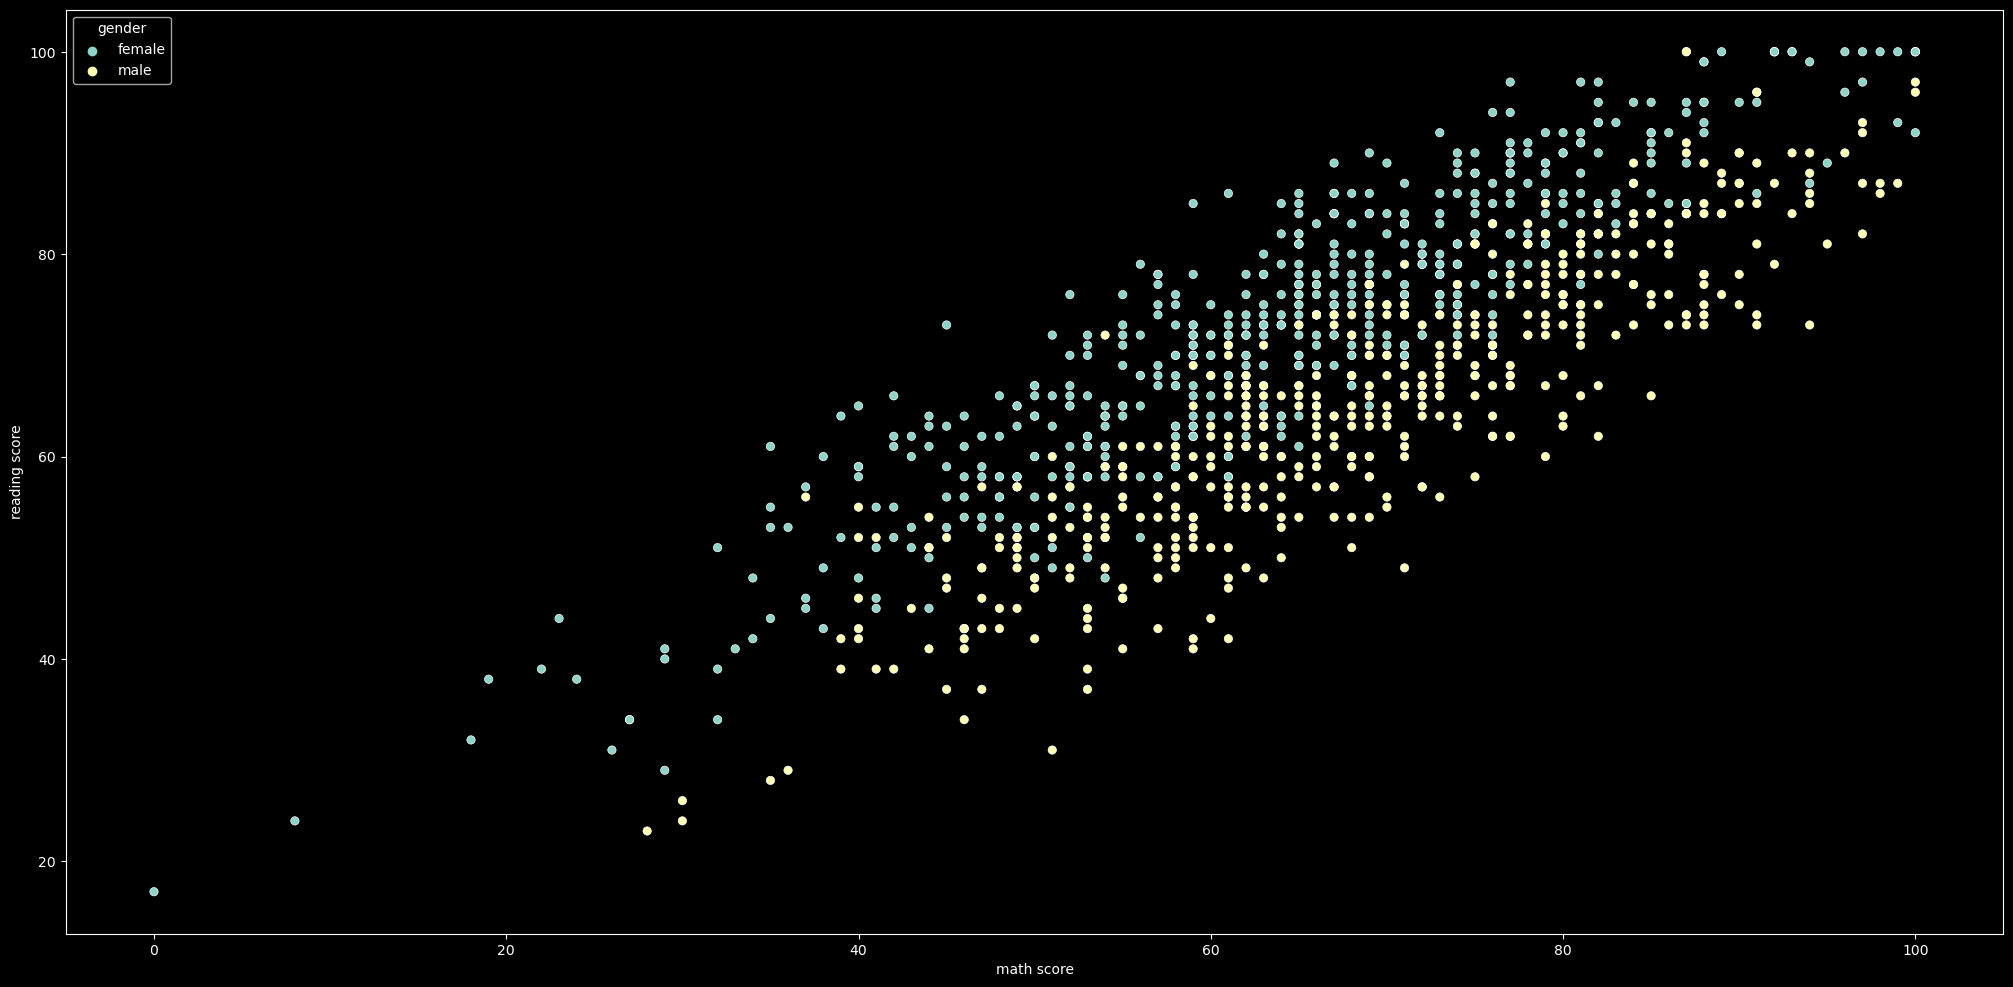

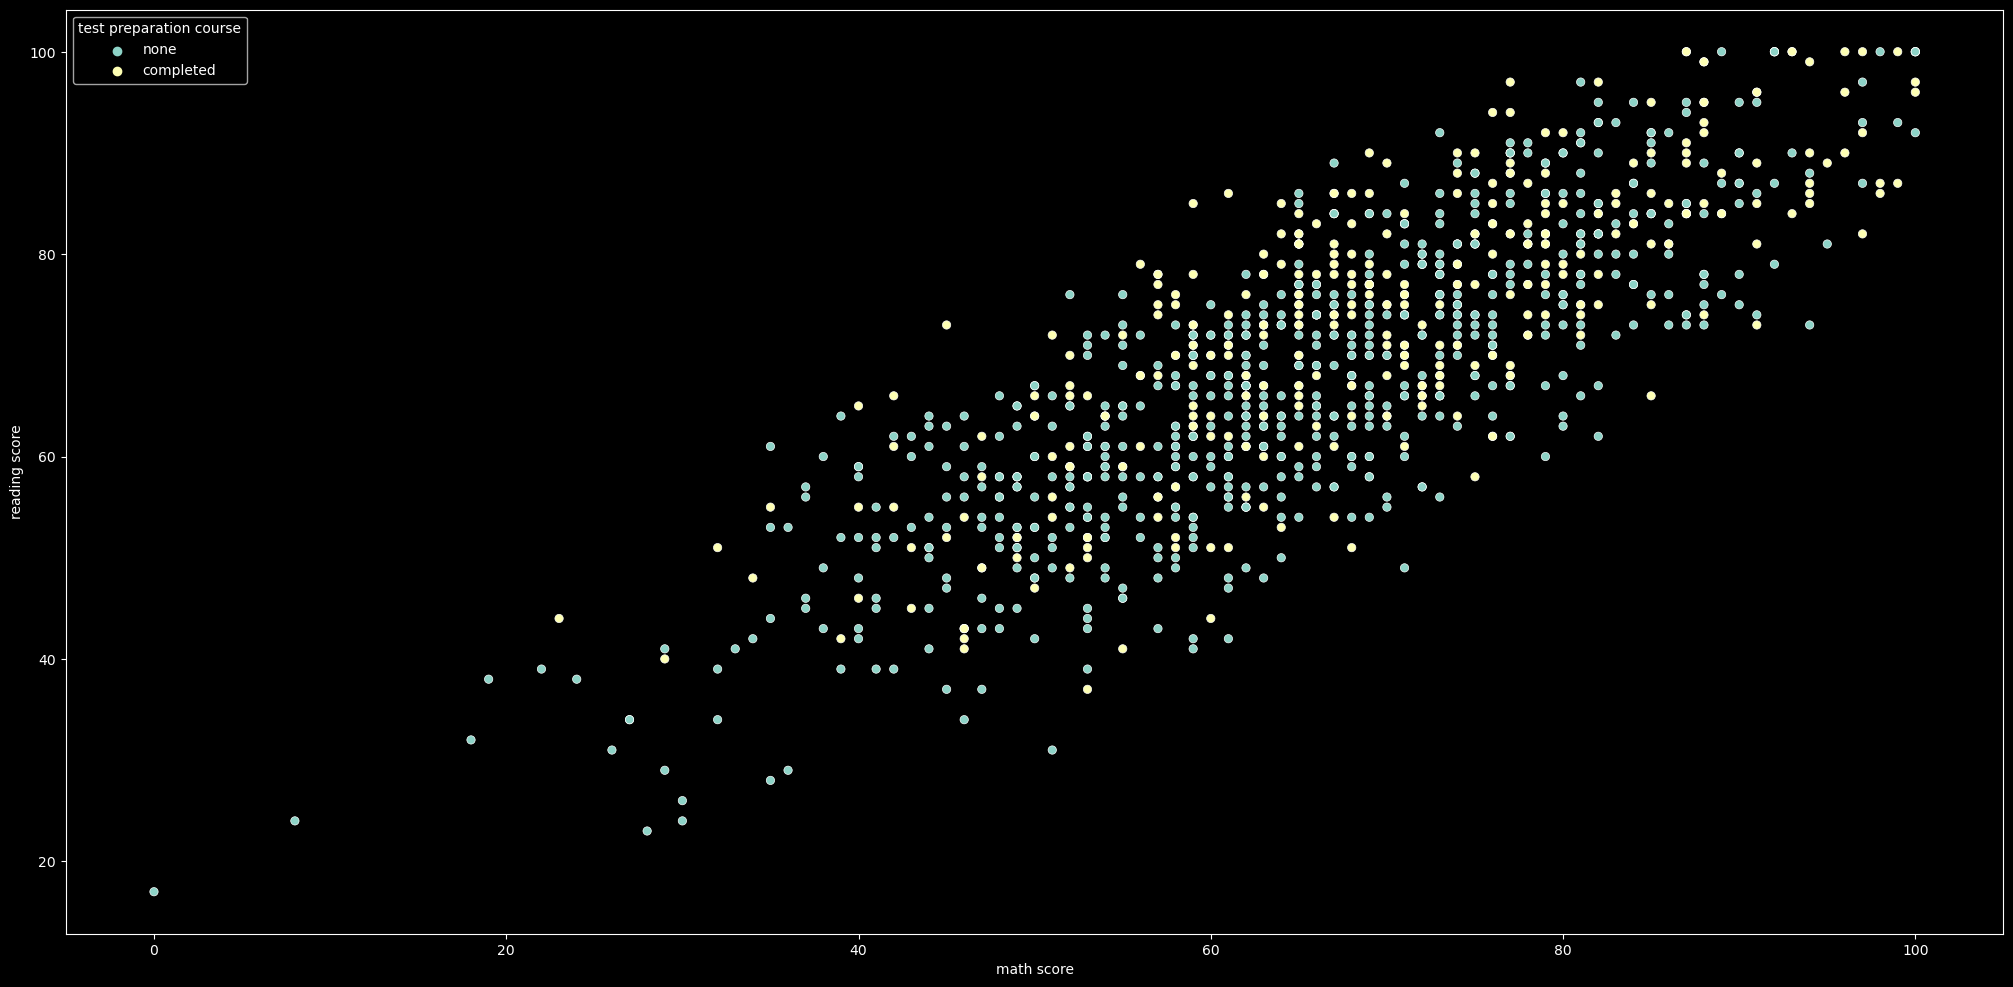

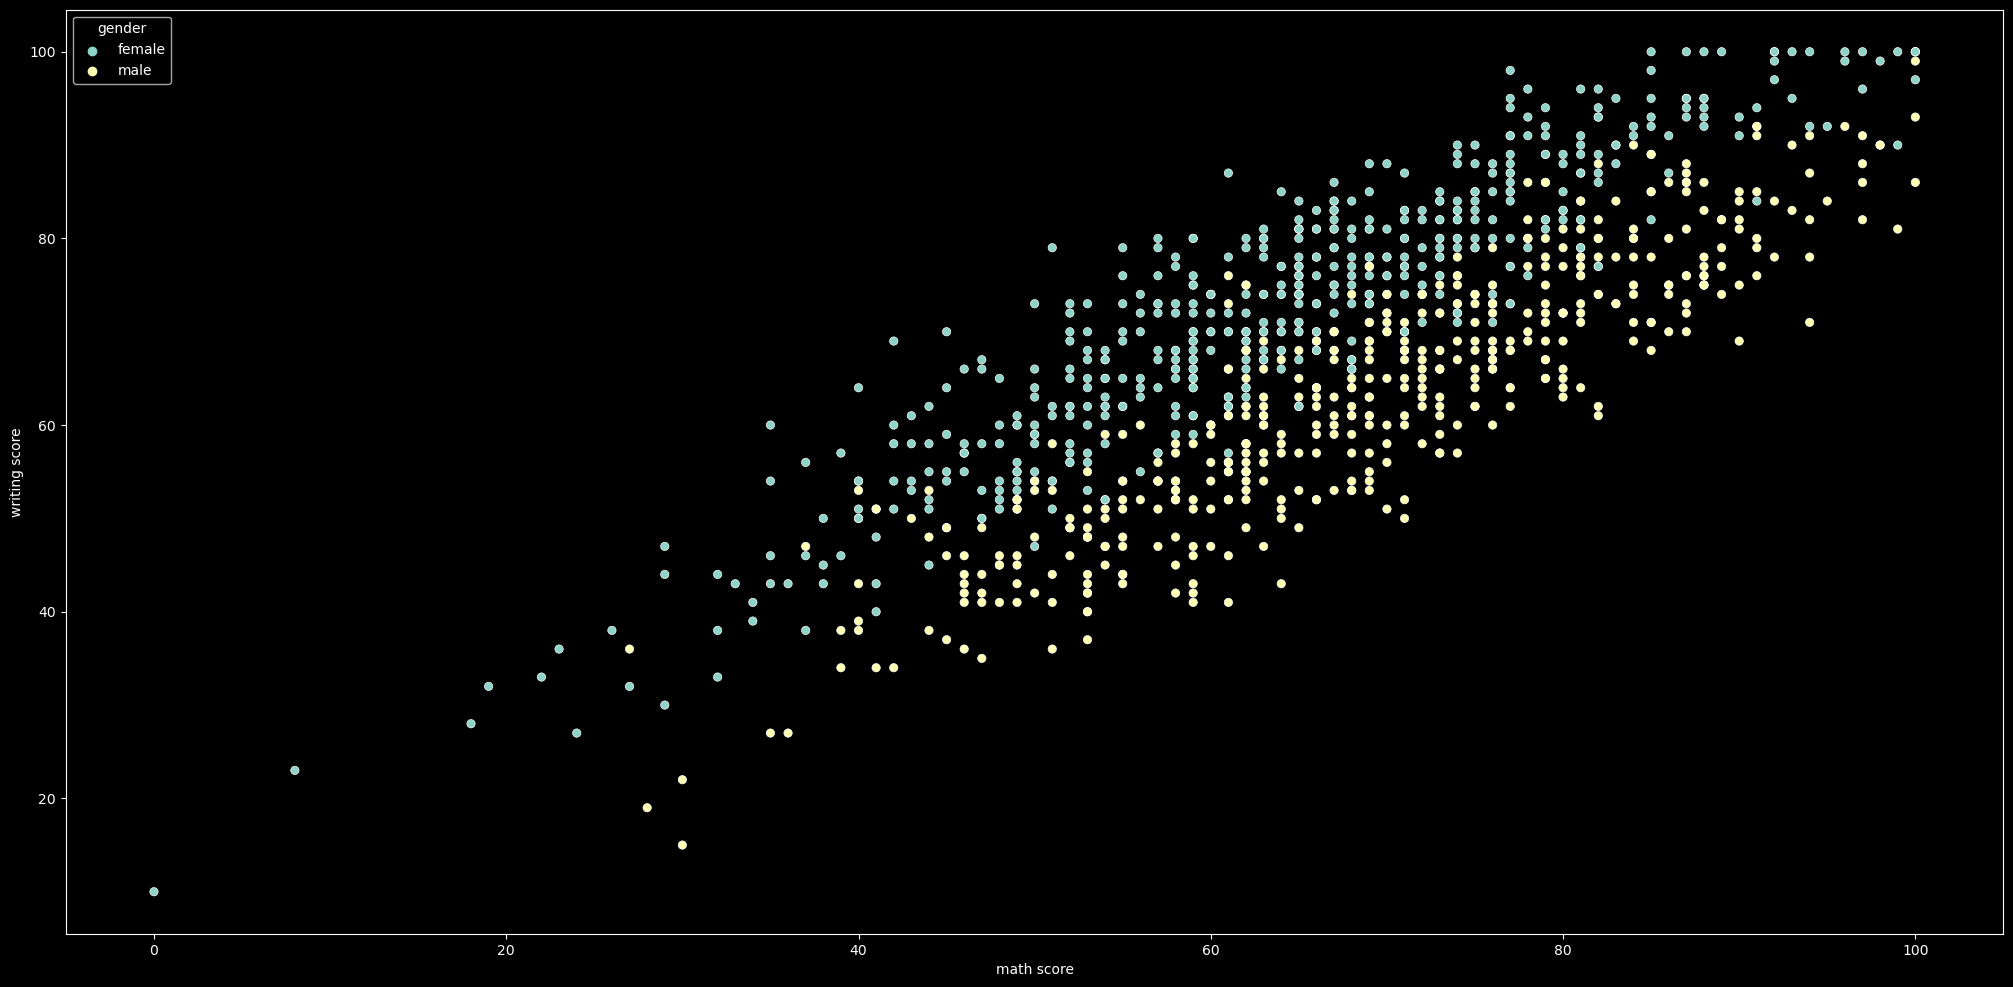

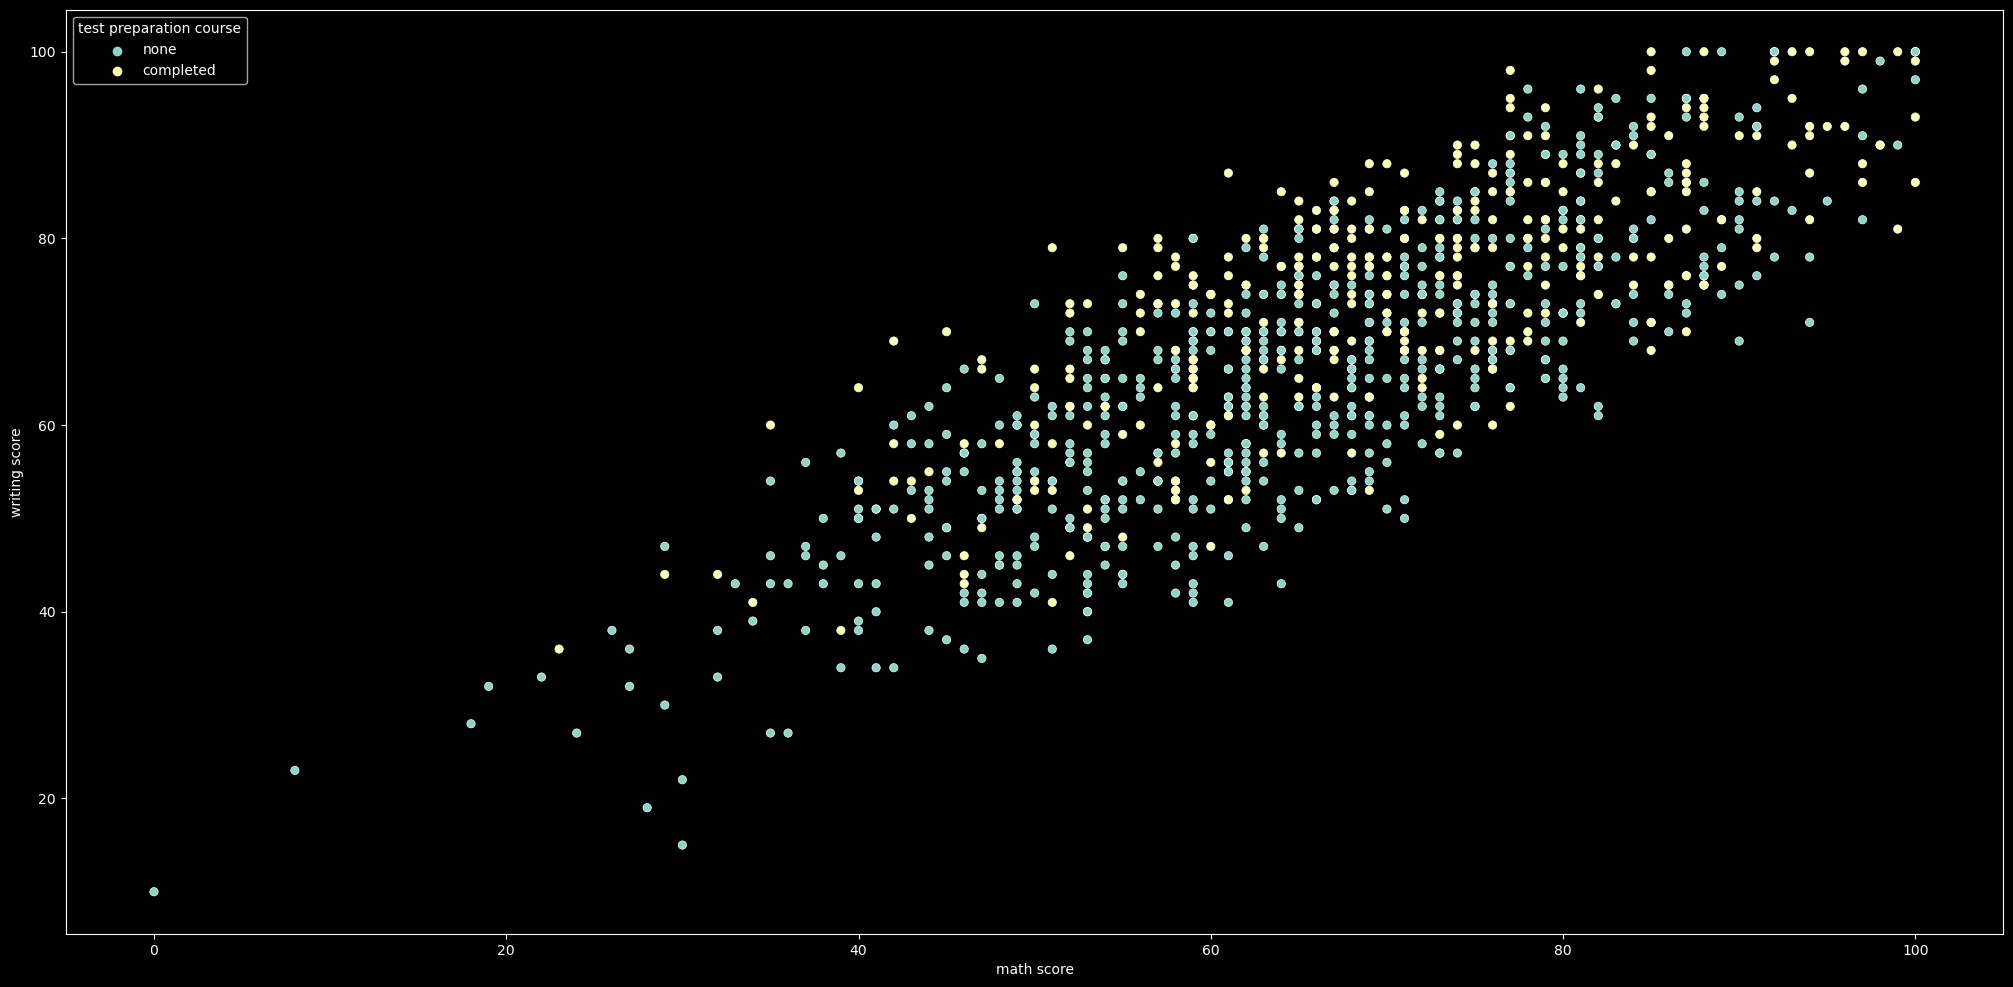

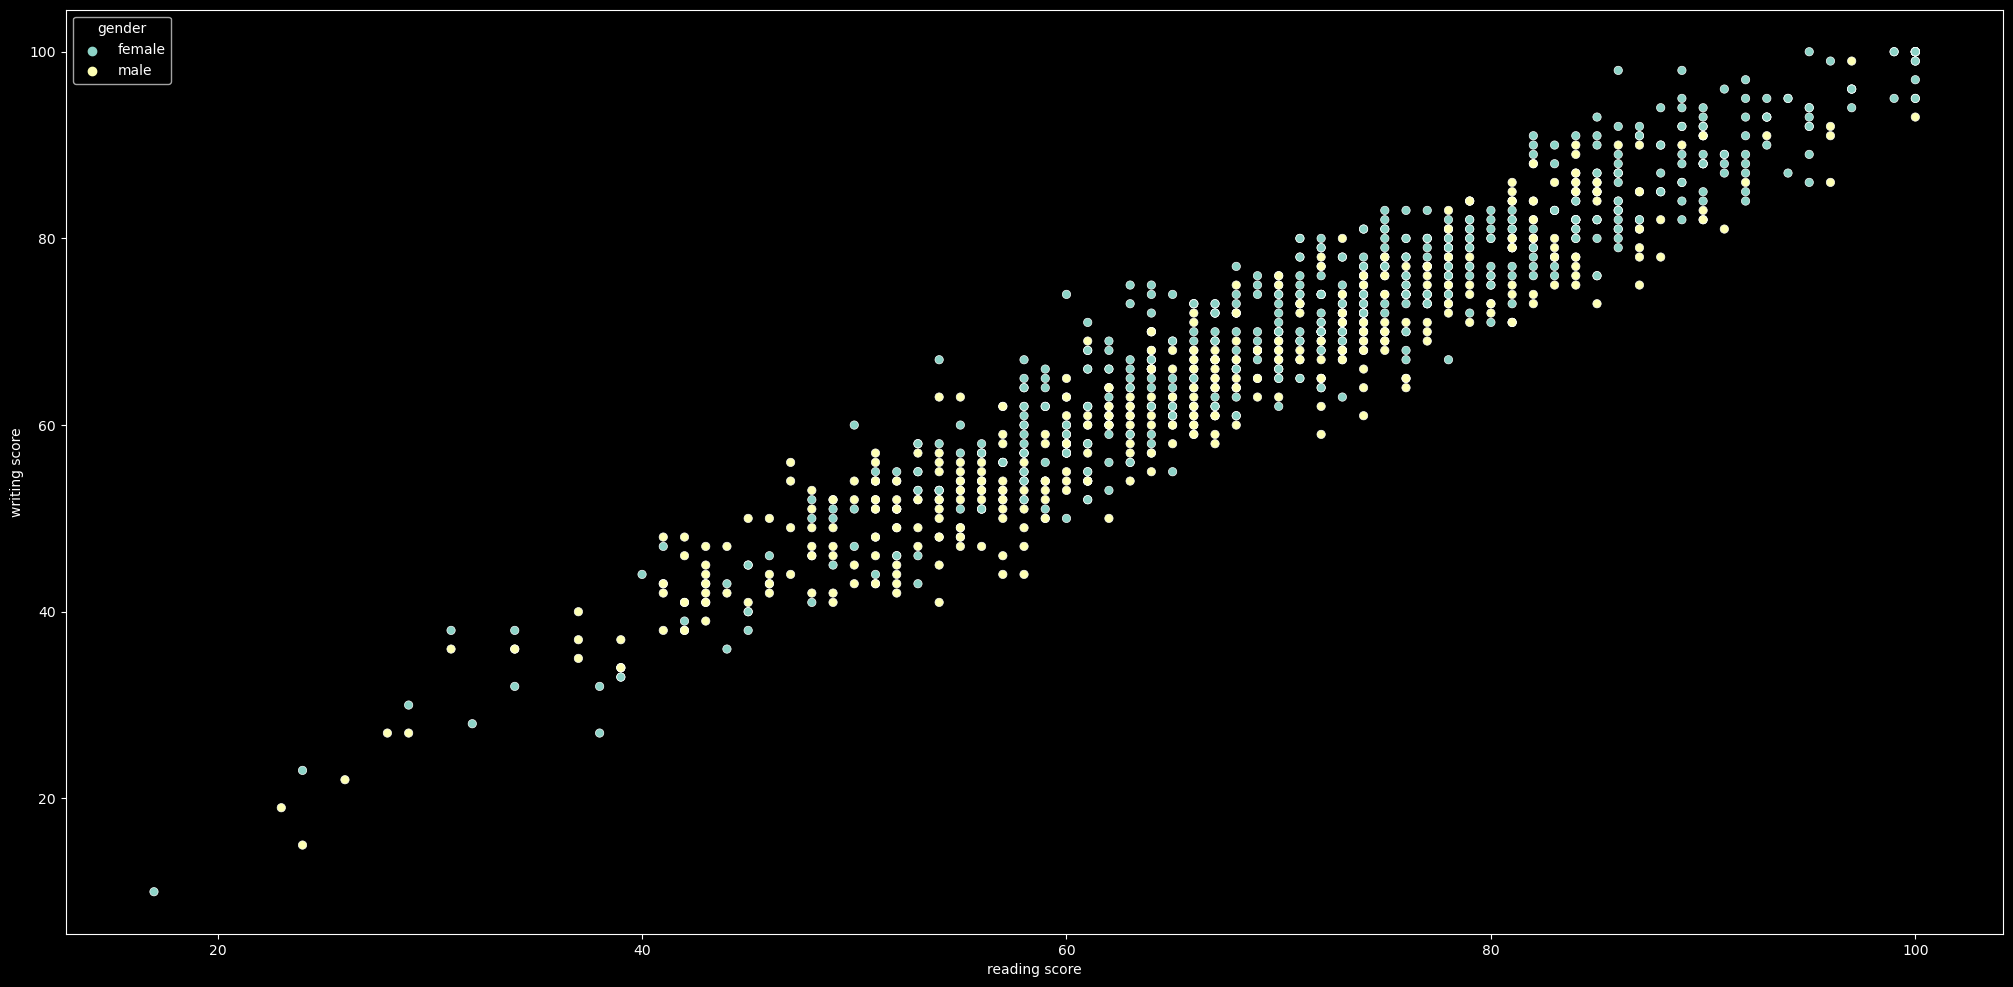

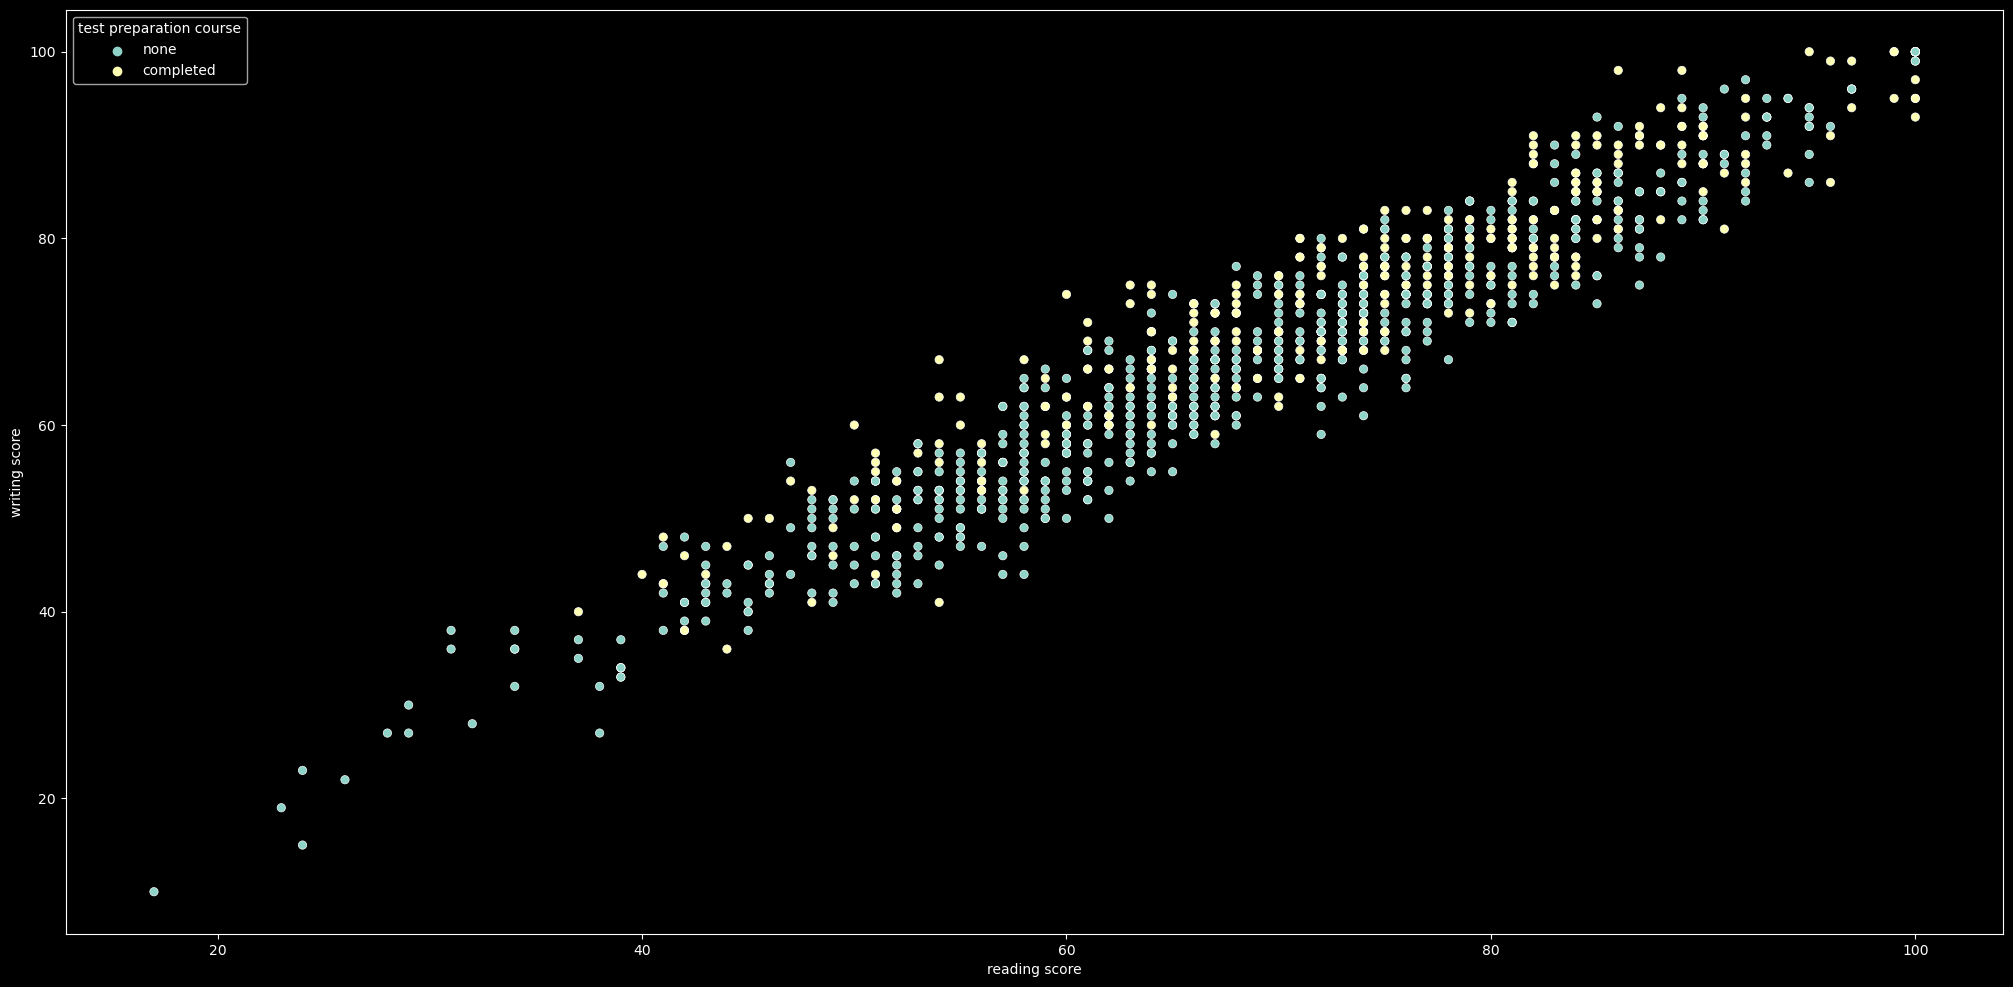

In [19]:

for subject1,subject2 in cols:
    for hu in hues:

        sns.scatterplot(data=data,x=subject1,y=subject2,hue=hu)
        #plt.clf()
        plt.show()
        